In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
from progress.bar import IncrementalBar

In [39]:
def plot(trace_file: str, comm_file: str, title: str = 'plot'):
    df = pd.read_csv(trace_file, index_col=0)

    time = pd.read_csv(comm_file, index_col=0)
    time = time.fillna('')

    processes = len(df.columns) // 3
    fig, ax = plt.subplots(figsize=(15,8))

    max_time = 0
    status = {}
    isLegendSet = False
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('%')))
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Await for receive':
                el.append('brown')
            elif y[i] == 'Balance':
                el.append('blue')
            elif y[i] == 'Receive':
                el.append('brown')
            elif y[i] == 'Send':
                el.append('orange')
            elif y[i] == 'Solve':
                el.append('green')
            else:
                el.append('black')
            if el[-1] not in status.keys():
                status[el[-1]] = False
            el.append(y[i])
            res.append(el)
        for el in res:
            if not status[el[2]]:
                status[el[2]] = True
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0, label=el[3])
            else:
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0)   
    scale = processes / max_time
    head_width = 2
    length = head_width * scale
    ax.legend()
#     for col in time.columns:
#         sndr, rcvr = map(int, col[1:-1].split(', '))
#         for interval in time[col]:
#             if interval != '':
#                 start, end = map(float, interval.split(':'))
#                 y = abs(rcvr-sndr)
#                 x = end-start
#                 gip = math.sqrt(y ** 2 + x ** 2)
#                 sin = y / gip
#                 width = (0.5 / 2 - 0.025 / 2) * sin + 0.025 / 2
#                 cos = x / gip
#                 lenth = (0.5 - 0.025) * cos + 0.025

#                 ax.arrow(start, sndr, end-start, rcvr-sndr, length_includes_head=True, width=width, head_length=lenth)
#     for col in time.columns:
#         sndr, rcvr = map(int, col[1:-1].split(', '))
#         for interval in time[col]:
#             if interval != '':
#                 start, end = map(float, interval.split(':'))
#                 ax.arrow(start, sndr, end-start, rcvr-sndr, length_includes_head=True)
    plt.xlabel('model time')
    plt.ylabel('process id')
    plt.title(title)
    plt.show()

In [35]:
def count(trace_file: str, comm_file: str):
    df = pd.read_csv(trace_file, index_col=0)

    time = pd.read_csv(comm_file, index_col=0)
    time = time.fillna('')

    processes = len(df.columns) // 3

    max_time = 0
    Tseq = 0
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('%')))
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Solve':
                Tseq += el[1] - el[0]
            el.append(y[i])
            res.append(el)

    acceleration = Tseq / max_time
    efficiency = acceleration / processes
    return acceleration, efficiency

In [36]:
import EngineThirdRefactored

In [37]:
# eng = EngineThirdRefactored.Engine(proc_amount=10, max_depth=20)
# eng.run()

# plot('Trace3R.csv', 'Communication3R.csv', 'Simple balancing algorithm')
# # cnt = count('Trace33.csv', 'Communication33.csv')
# # print(f'Speedup: {cnt[0]}\nEfficiency: {cnt[1]}')


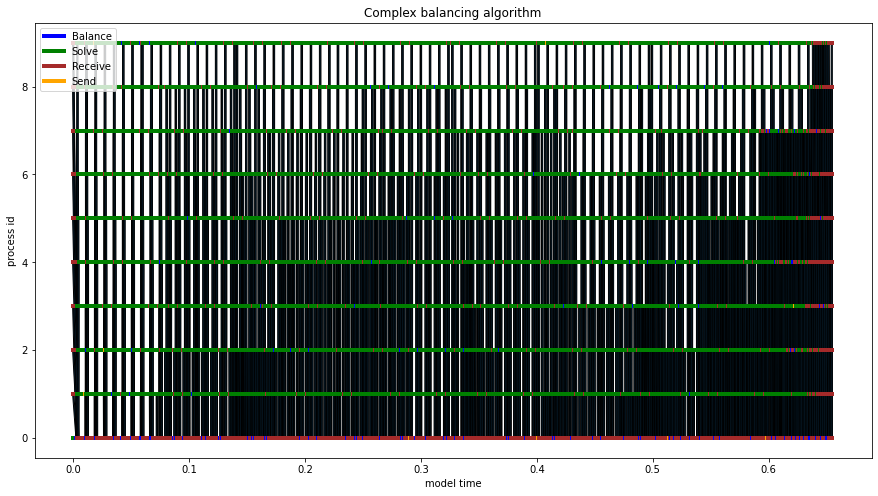

In [38]:
plot('TraceC.csv', 'CommunicationC.csv', 'Complex balancing algorithm')

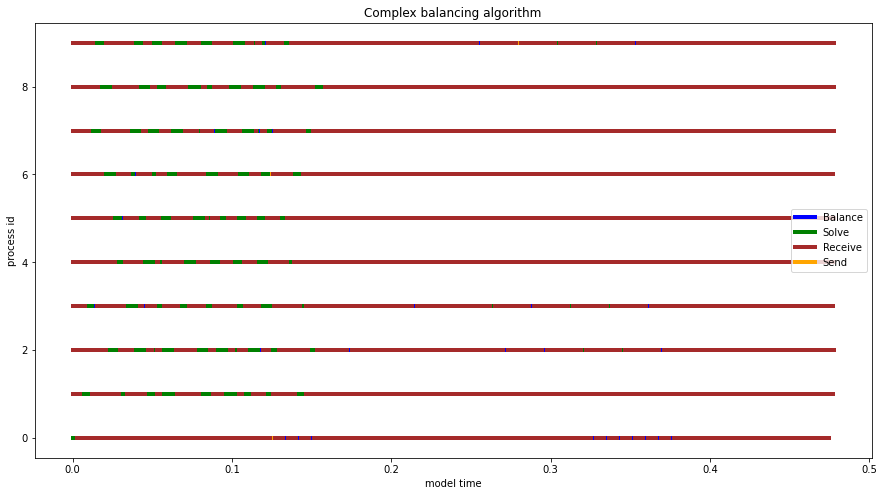

In [46]:
plot('TraceC.csv', 'CommunicationC.csv', 'Complex balancing algorithm')

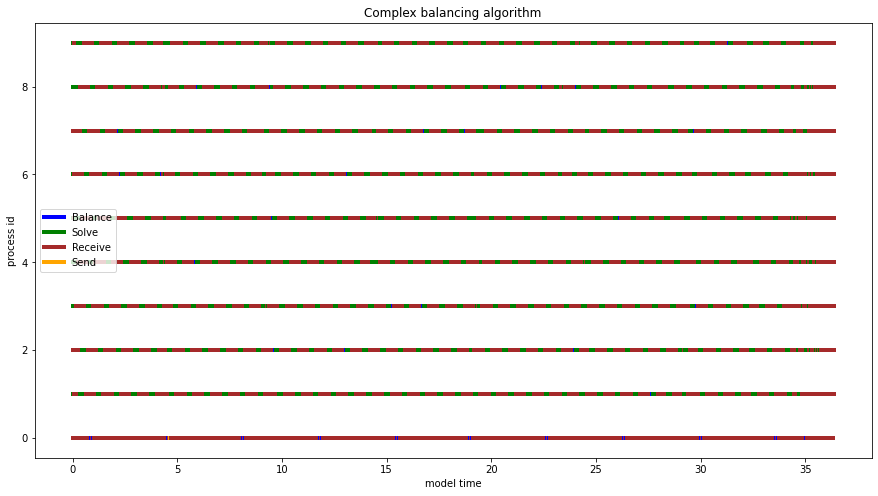

In [55]:
plot('TraceC.csv', 'CommunicationC.csv', 'Complex balancing algorithm')

In [49]:
def plot_statistics(trace_file: str, title: str = 'Stat plot'):
    df = pd.read_csv(trace_file, index_col=0)

    processes = len(df.columns) // 3
    fig, ax = plt.subplots(figsize=(15,8))

    x_rcv = np.arange(0, processes) - 0.3
    x_snd = np.arange(0, processes) - 0.1
    x_slv = np.arange(0, processes) + 0.1
    x_blc = np.arange(0, processes) + 0.3
    
    y_rcv = []
    y_snd = []
    y_slv = []
    y_blc = []
    
    status = {}
    isLegendSet = False
    for j in range(processes):
        times = list(df['timestamp' + str(j)].fillna(-1))[1:]
        states = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        rcv = 0.
        snd = 0.
        slv = 0.
        blc = 0.
        for i, el in enumerate(times):
            if el == -1:
                continue
            el = list(map(float, el.split('%')))
            if states[i] == 'Await for receive':
                el.append('red')
            elif states[i] == 'Balance':
                blc += el[1] - el[0]
            elif states[i] == 'Receive':
                rcv += el[1] - el[0]
            elif 'Send' in states[i]:
                snd += el[1] - el[0]
            elif states[i] == 'Solve':
                slv += el[1] - el[0]
        y_rcv.append(rcv)
        y_snd.append(snd)
        y_slv.append(slv)
        y_blc.append(blc)
    
    colors = {'rcv': 'brown', 'snd': 'orange', 'slv': 'green', 'blc': 'blue'}
    
    bar_plot = ax.bar(x_rcv, y_rcv, width = 0.2, color=colors['rcv'])
    bar_plot = bar_plot + ax.bar(x_snd, y_snd, width = 0.2, color=colors['snd'])
    bar_plot = bar_plot + ax.bar(x_slv, y_slv, width = 0.2, color=colors['slv'])
    bar_plot = bar_plot + ax.bar(x_blc, y_blc, width = 0.2, color=colors['blc'])
    
    bar_label=y_rcv+y_snd+y_slv+y_blc
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                round(bar_label[idx], 4),
                ha='center', va='bottom', rotation=90)
    
    for k, v in colors.items():
        ax.bar(-1, 0, width = 0, color=v, label=k)

    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    ax.legend()
    plt.ylabel('time')
    plt.xlabel('process id')
    plt.title(title)
    plt.show()

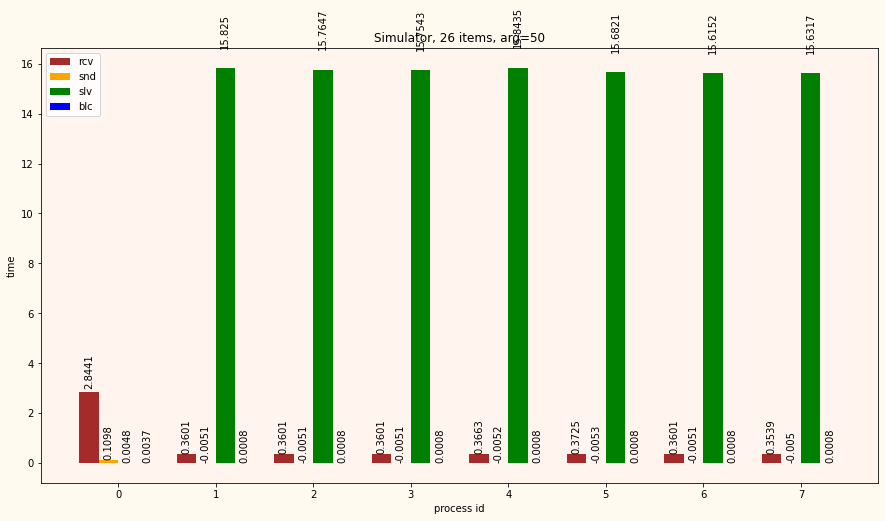

In [97]:
plot_statistics('TraceS.csv', 'Simulator, 26 items, arg=50')

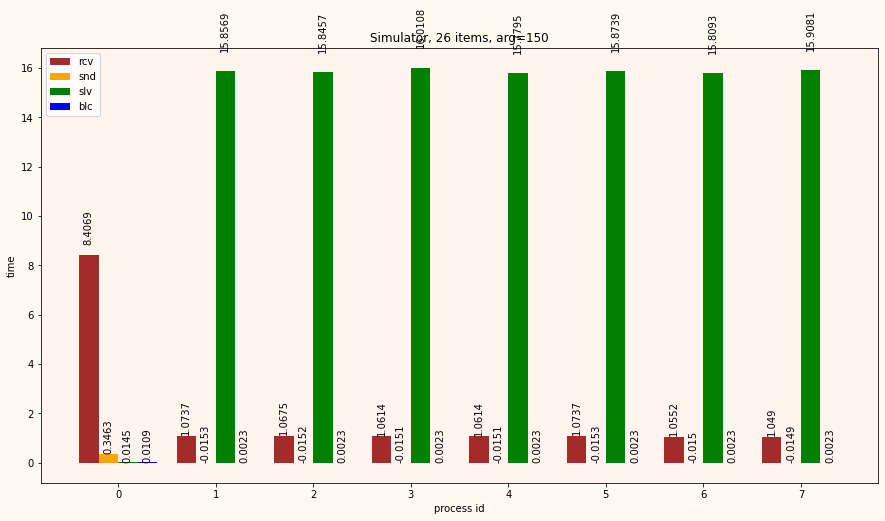

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


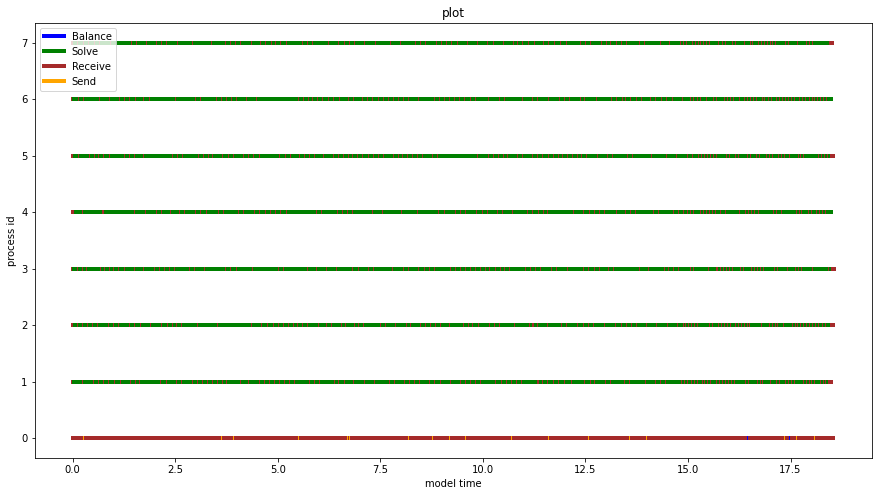

In [100]:
plot_statistics('TraceS.csv', 'Simulator, 26 items, arg=150')
plot('TraceS.csv', 'CommunicationS.csv')

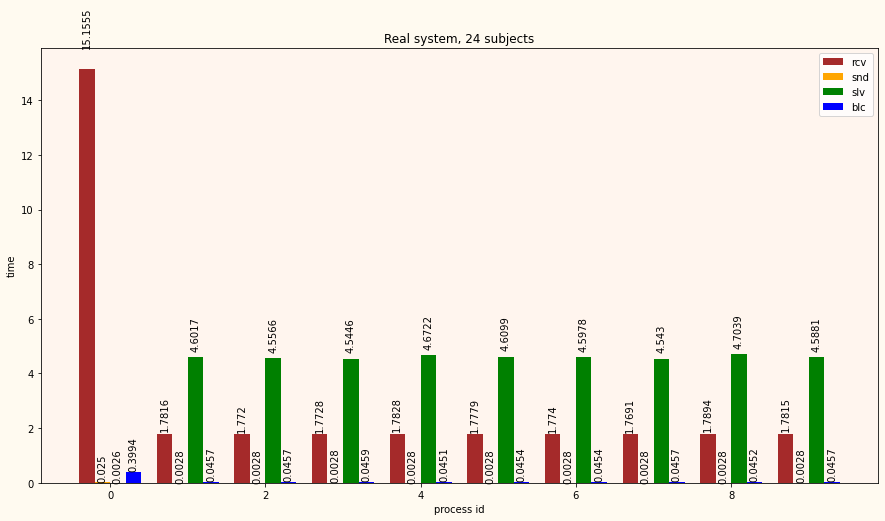

In [53]:
plot_statistics('TraceC.csv', 'Real system, 24 subjects')

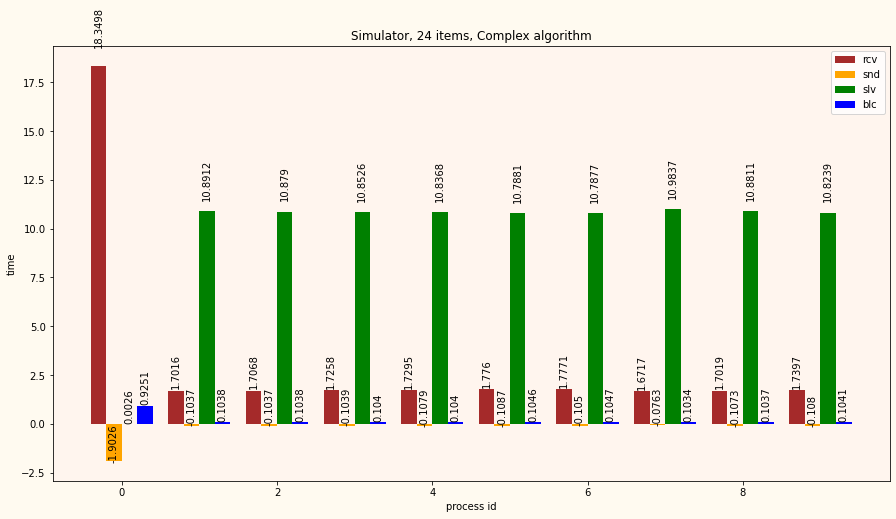

In [65]:
plot_statistics('TraceC.csv', 'Simulator, 24 items, Complex algorithm')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


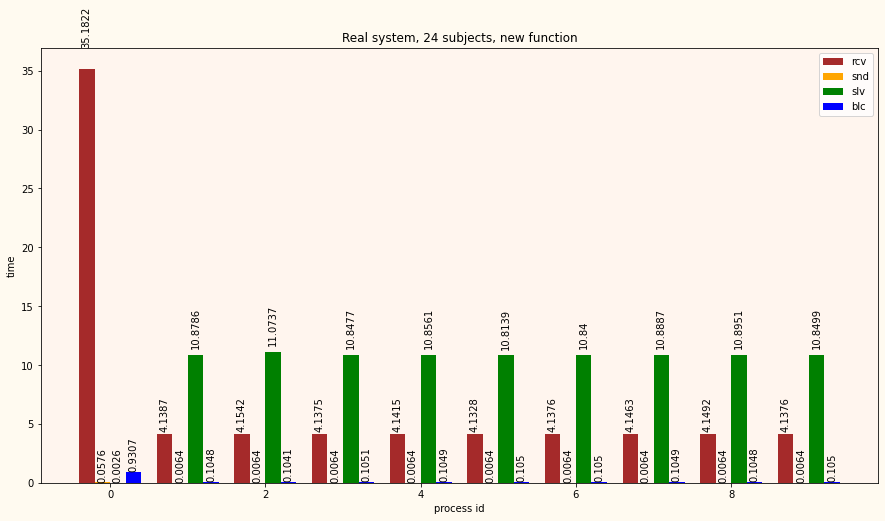

In [54]:
plot_statistics('TraceC.csv', 'Real system, 24 subjects, new function')

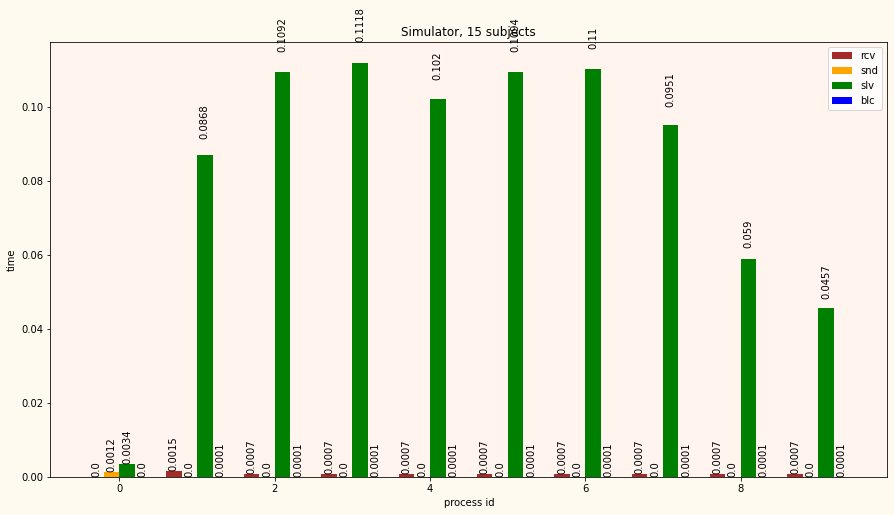

In [57]:
plot_statistics('TraceS.csv', 'Simulator, 15 subjects')

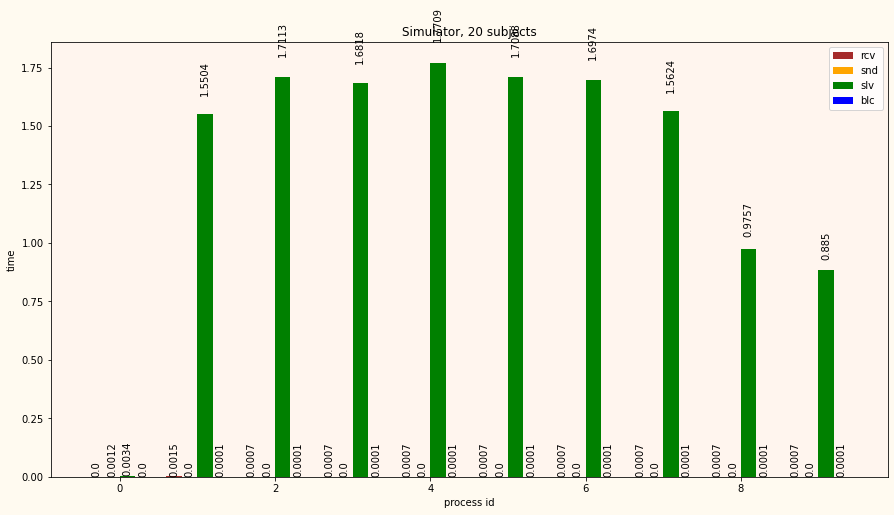

In [58]:
plot_statistics('TraceS.csv', 'Simulator, 20 subjects')

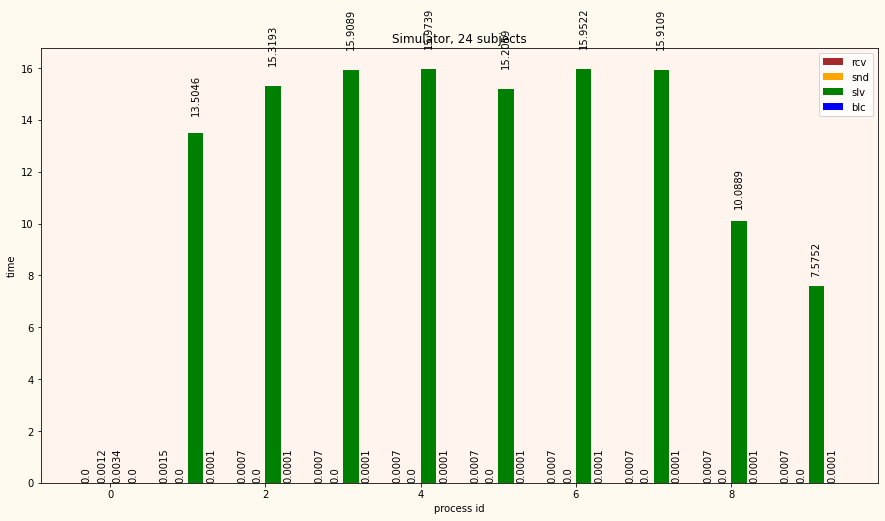

In [59]:
plot_statistics('TraceS.csv', 'Simulator, 24 subjects')

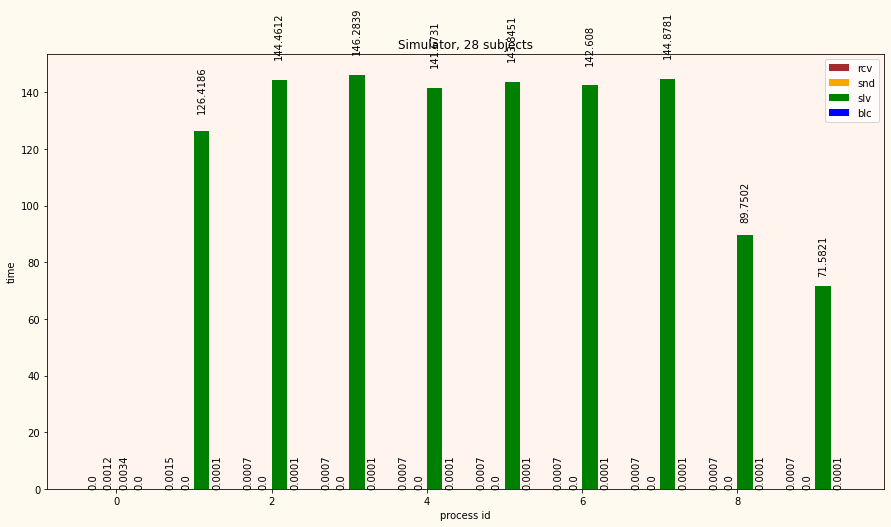

In [60]:
plot_statistics('TraceS.csv', 'Simulator, 28 subjects')

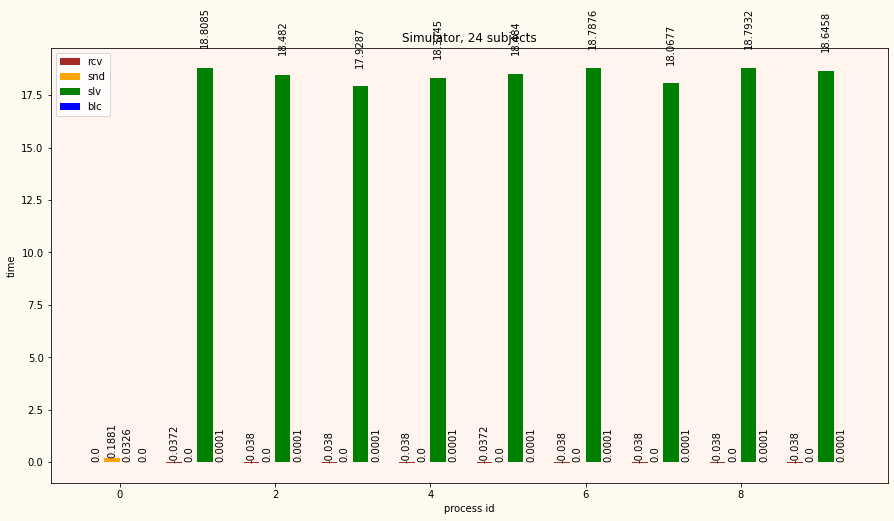

In [66]:
plot_statistics('TraceS.csv', 'Simulator, 24 subjects')

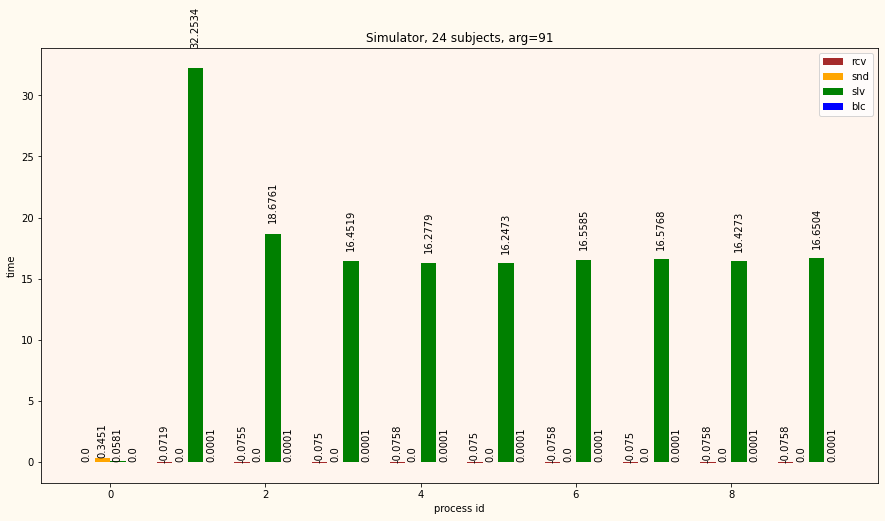

In [67]:
plot_statistics('TraceS.csv', 'Simulator, 24 subjects, arg=91')

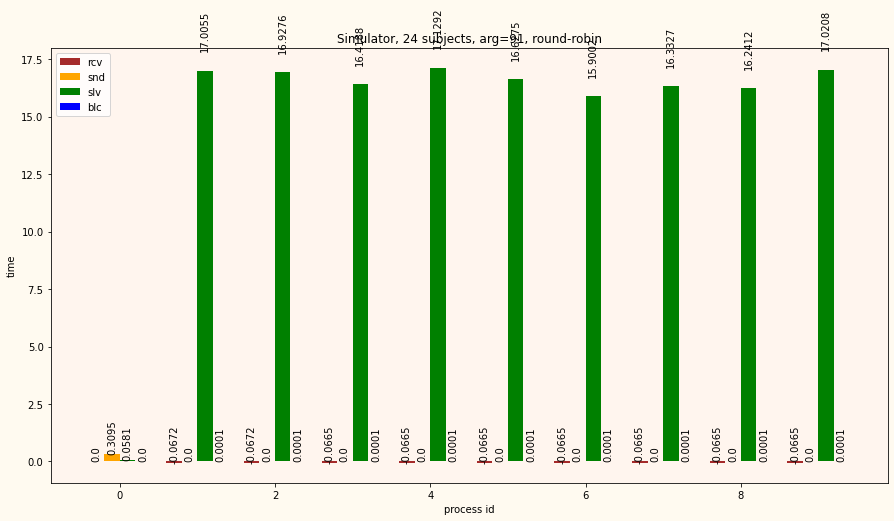

In [69]:
plot_statistics('TraceS.csv', 'Simulator, 24 subjects, arg=91, round-robin')

In [ ]:
[*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*]

# Find best arg

In [61]:
df = pd.read_csv('argtime.csv', names=['time', 'arg'])

In [76]:
def plot_best_arg_founding(df):
    plt.figure(figsize=(20, 10))
    plt.plot(df.arg, df.time)
    plt.xlabel('argument')
    plt.ylabel('time')
    plt.title('Simple algo, time/arg dependency, simulator')
    plt.show()


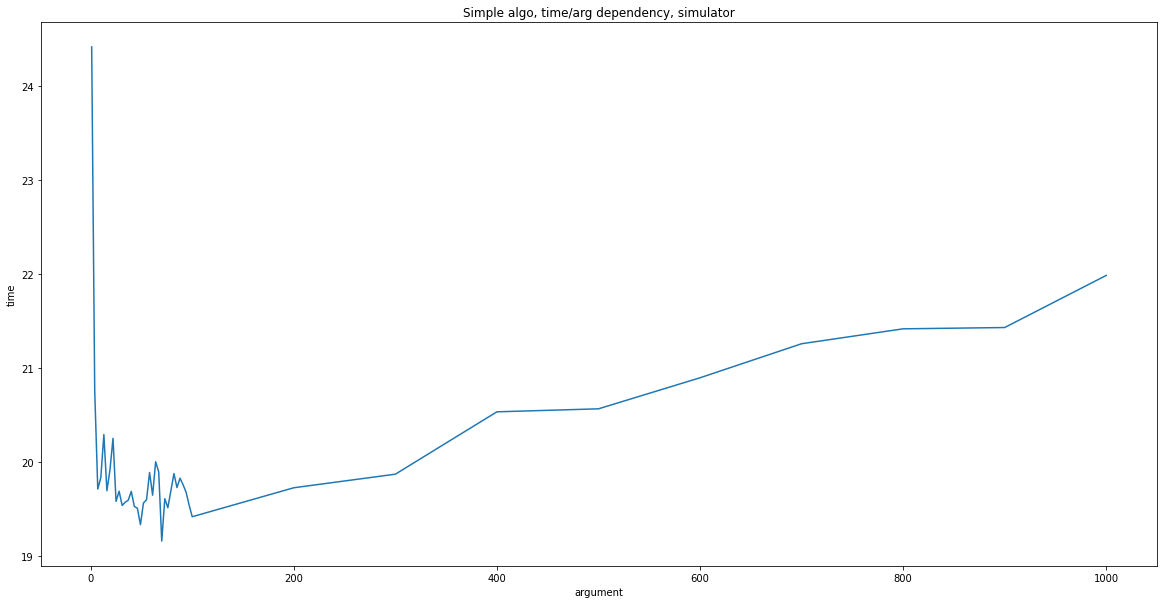

In [82]:
df = pd.read_csv('argtime-rr-big-values.csv', names=['time', 'arg'])
plot_best_arg_founding(df)


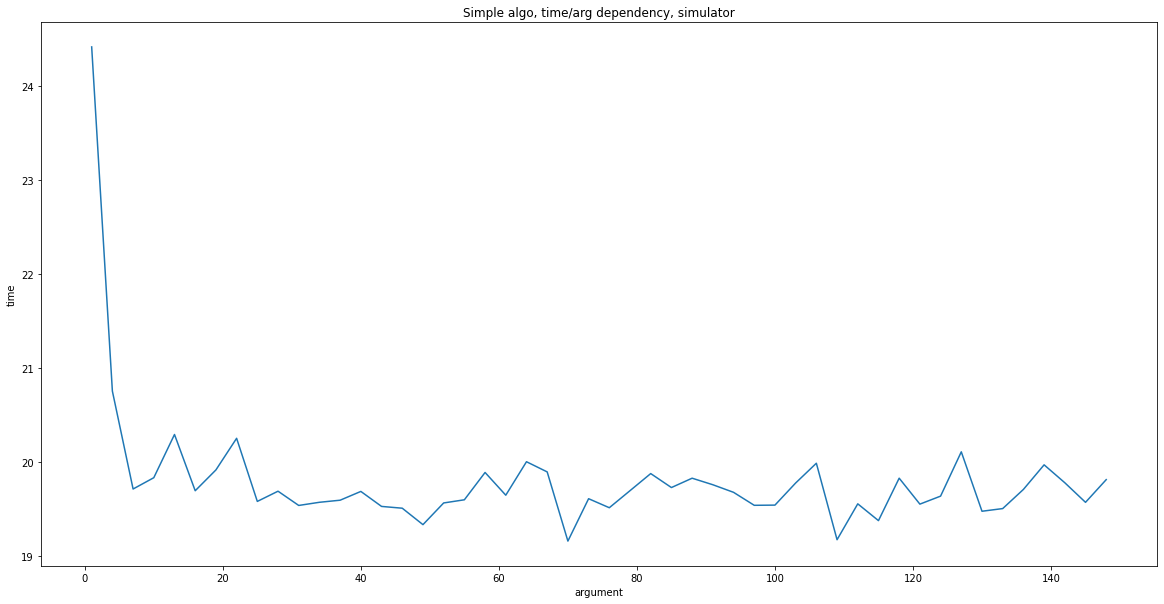

In [80]:
df = pd.read_csv('argtime-rr.csv', names=['time', 'arg'])
plot_best_arg_founding(df)


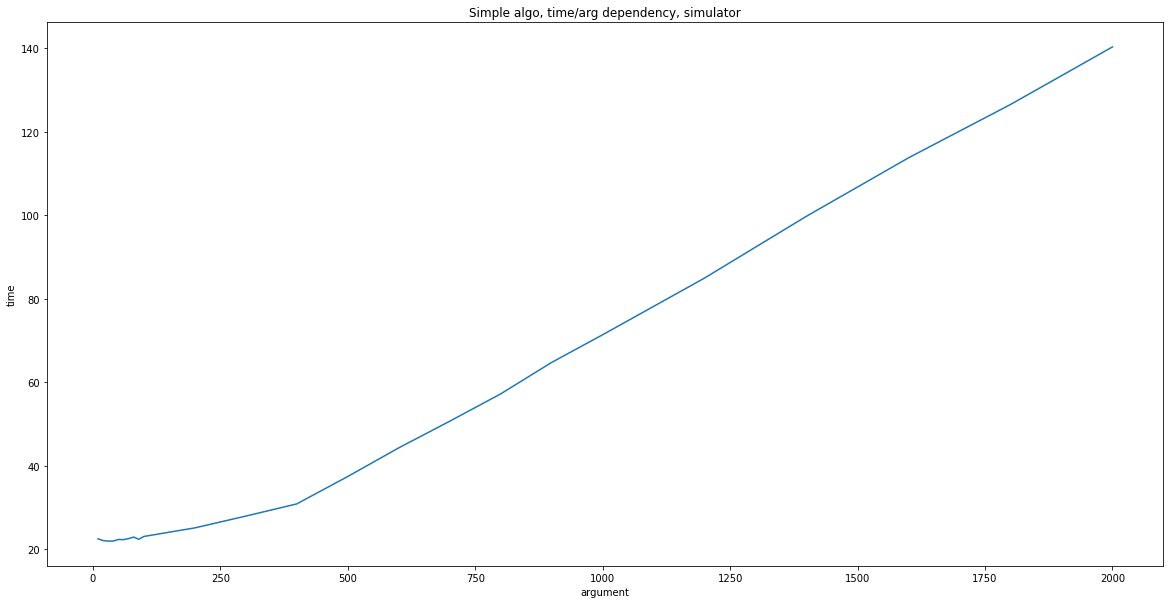

In [85]:
df = pd.read_csv('argtime-ls', names=['time', 'arg'])
plot_best_arg_founding(df)


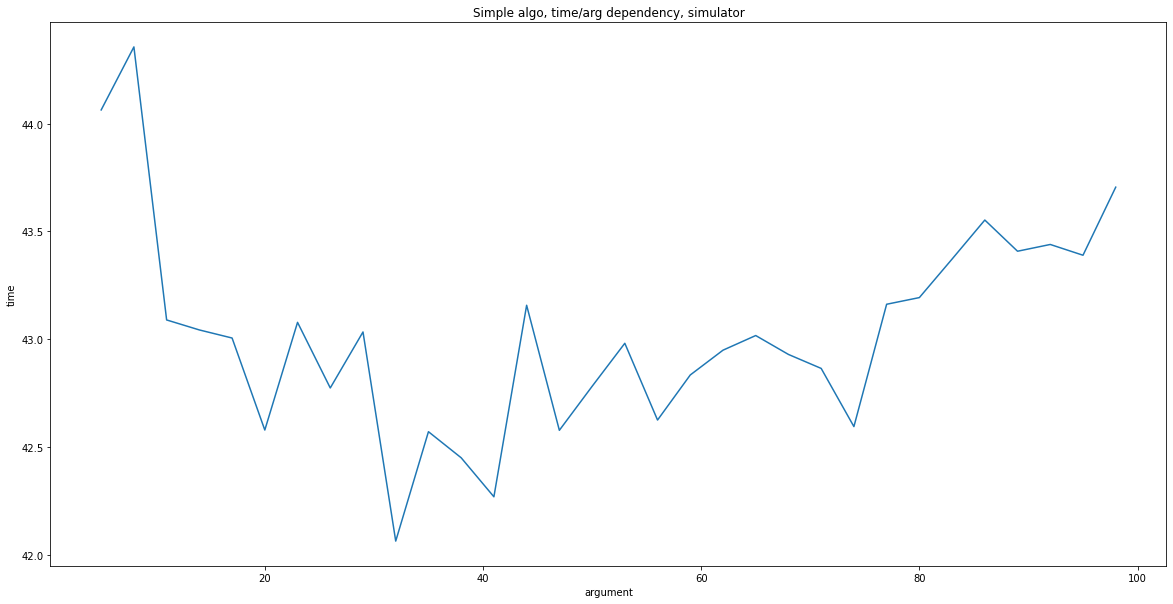

In [86]:
df = pd.read_csv('argtime-ls-copy.csv', names=['time', 'arg', 'items'])
plot_best_arg_founding(df)


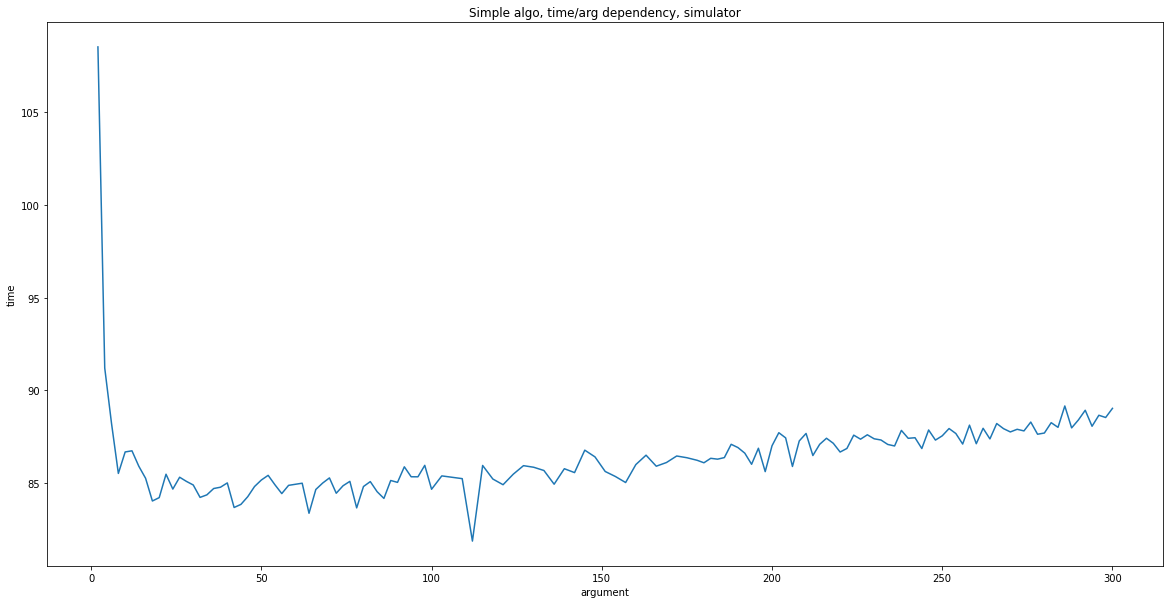

In [87]:
df = pd.read_csv('argtime-ls-all-26.csv', names=['time', 'arg', 'items'])
plot_best_arg_founding(df)


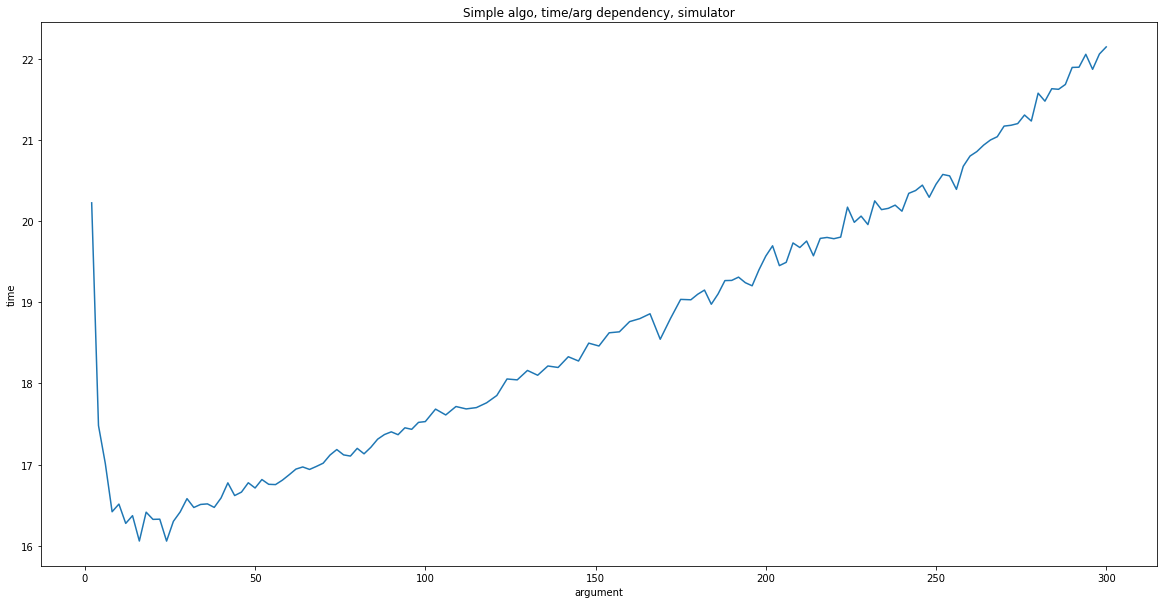

In [96]:
df = pd.read_csv('argtime-ls-all-26.csv', names=['time', 'arg', 'items'])
plot_best_arg_founding(df)


In [92]:
def plotMovingAverage(series, window):

    """
        series - dataframe with timeseries
        window - rolling window size 
    """
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(15,5))
    plt.title("Simulator\nMoving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
#     plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [93]:
tim = df.drop(columns='items').copy()
tim.index = tim.arg
tim = tim.drop(columns='arg')

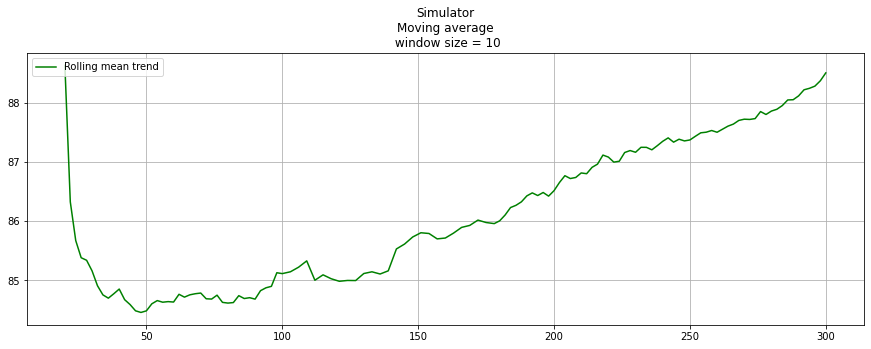

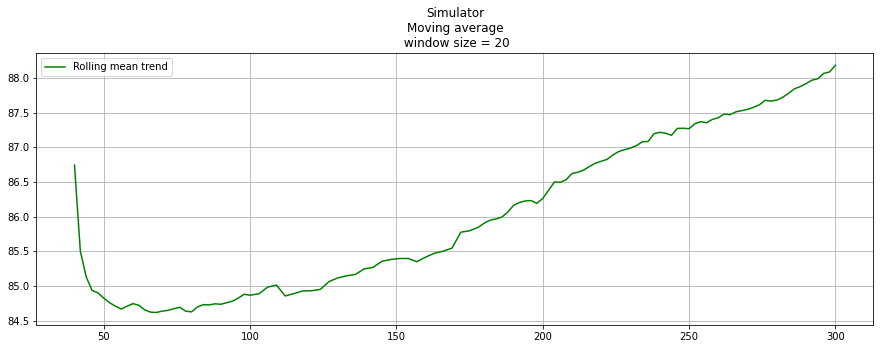

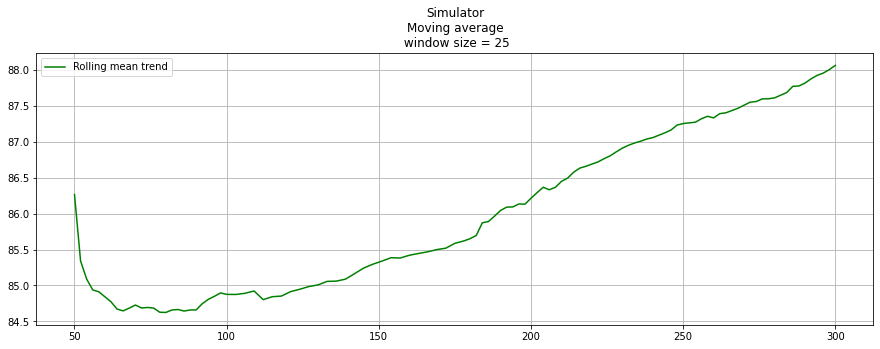

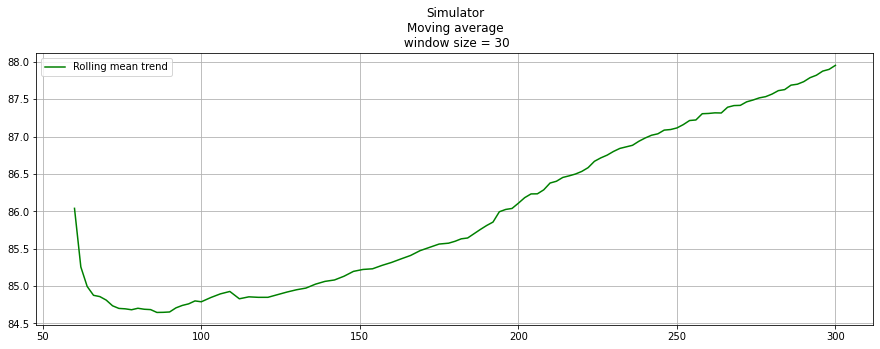

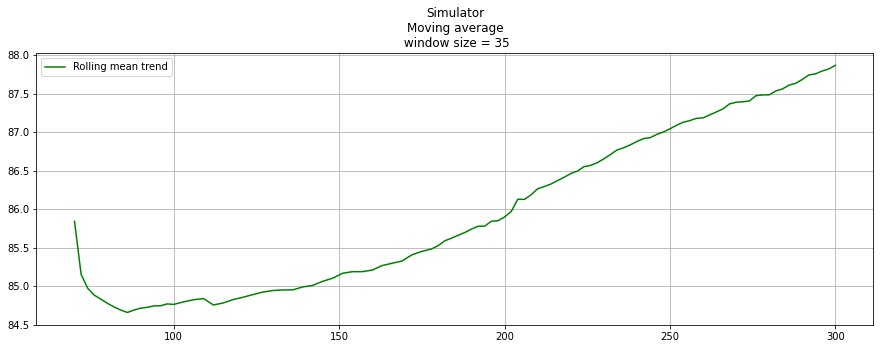

In [95]:
plotMovingAverage(tim, 10)
plotMovingAverage(tim, 20)
plotMovingAverage(tim, 25)
plotMovingAverage(tim, 30)
plotMovingAverage(tim, 35)


In [8]:
am = 0
suma = (0, 0)
for i in tqdm(range(am)):
    try:
        eng = Engine(proc_amount=10, max_depth=20)
        eng.run()
    except Exception:
#         print('n')
        continue
    cur = count('Trace.csv', 'Communication.csv')
    suma = tuple(map(sum, zip(suma, cur)))
# suma
acc_average = suma[0] / am
eff_average = suma[1] / am

print(f'Acceleration: {acc_average}\nEfficiency: {eff_average}')

0it [00:00, ?it/s]


ZeroDivisionError: division by zero

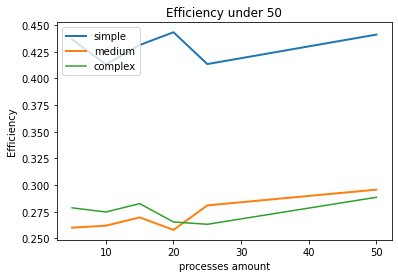

In [10]:
x1=[0.436482114,0.413069099,0.431287537,0.443265368,0.413425653,0.441064898]
x2=[0.259990096,0.26185991,0.269618974,0.257903146,0.280897581,0.295667281]
x3=[0.278613218,0.274713947,0.282554042,0.265360369,0.26316751,0.288510803]

x4=[0.610337353,0.628401689,0.616084879,0.622497127,0.619263894]
x5=[0.657465962,0.650249205,0.651677935,0.641132954,0.631164836]
x6=[0.697555496,0.673020157,0.687210302,0.675430268,0.69638548]

x7=[0.647148483,0.664537678,0.649004463,0.651378291,0.625314868,0.633828124]
x8=[0.817585103,0.779793032,0.803009341,0.805948317,0.777709897,0.791460961]
x9=[0.840410834,0.867059051,0.832178328,0.85787612,0.842881944,0.855508134]

y1=[5, 10, 15, 20, 25, 50]
y2=[100, 150, 200, 250, 500]
y3=[1000, 1500, 2000, 2500, 5000, 10000]

# x = np.arange(0, 2*np.pi, 0.02)
# y = np.sin(x)
# y1 = np.sin(2*x)
# y2 = np.sin(3*x)
# ym1 = np.ma.masked_where(y1 > 0.5, y1)
# ym2 = np.ma.masked_where(y2 < -0.5, y2)

lines = plt.plot(y1, x1, y1, x2, y1, x3)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], markersize=2)

plt.legend(('simple', 'medium', 'complex'),
           loc='upper left')
plt.title('Efficiency under 50')
plt.xlabel('processes amount')
plt.ylabel('Efficiency')

plt.show()

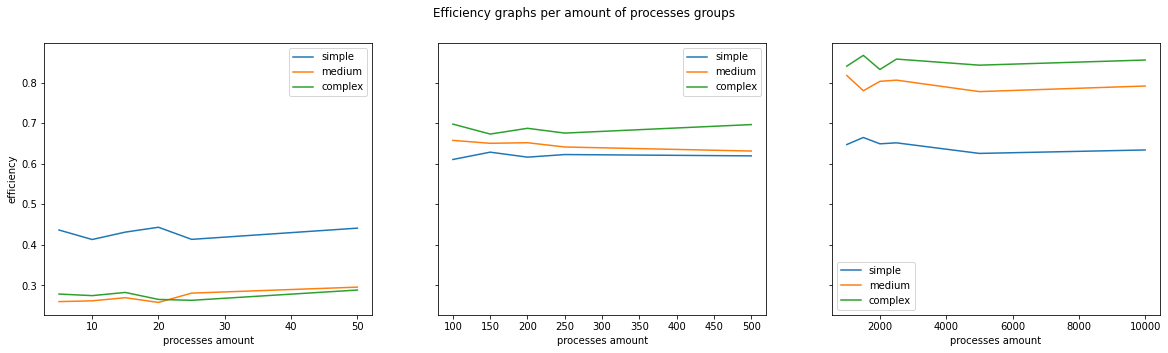

In [39]:
import numpy as np


fig, axs = plt.subplots(1, 3,figsize=(20,5), sharey=True)
fig.suptitle('Efficiency graphs per amount of processes groups')
axs[0].plot(y1, x1, y1, x2, y1, x3)
# axs[0].set_title('Efficiency')
axs[0].legend(('simple', 'medium', 'complex'))

axs[1].plot(y2, x4, y2, x5, y2, x6)
# axs[1].set_title('Axis [0,1]')
axs[1].legend(('simple', 'medium', 'complex'))

axs[2].plot(y3, x7, y3, x8, y3, x9)
# axs[2].set_title('Axis [0,1]')
axs[2].legend(('simple', 'medium', 'complex'))

for ax in axs.flat:
    ax.set(xlabel='processes amount', ylabel='efficiency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

In [41]:
a1=[2.182410568,4.130690991,6.469313061,8.865307353,10.33564132,22.05324492]
a2=[1.29995048,2.618599101,4.044284614,5.158062911,7.022439515,14.78336405]
a3=[1.393066088,2.747139469,4.238310635,5.30720738,6.579187748,14.42554013]

a4=[61.03373534,94.26025333,123.2169758,155.6242817,309.6319472]
a5=[65.74659619,97.53738074,130.3355869,160.2832386,315.5824182]
a6=[69.75554958,100.9530236,137.4420605,168.8575671,348.1927401]

a7=[647.1484826,996.806517,1298.008925,1628.445728,3126.574339,6338.281238]
a8=[817.5851029,1169.689548,1606.018681,2014.870791,3888.549484,7914.609614]
a9=[840.4108343,1300.588576,1664.356655,2144.690299,4214.409718,8555.081345]

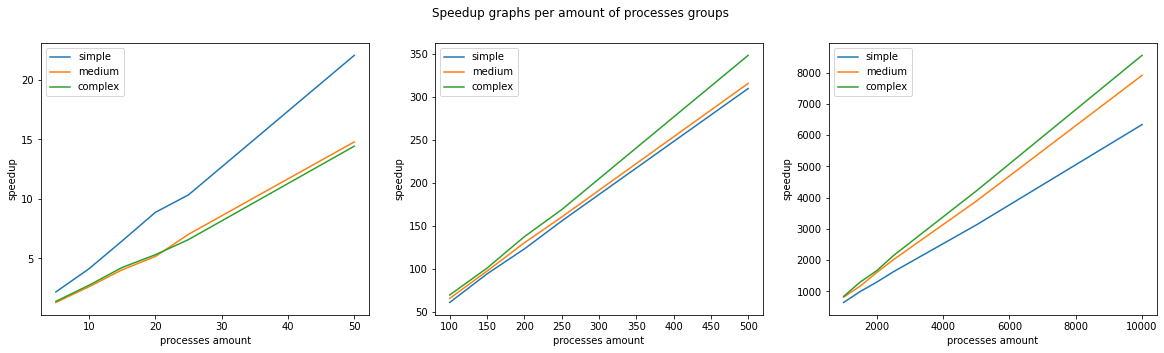

In [45]:
fig, axs = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Speedup graphs per amount of processes groups')
axs[0].plot(y1, a1, y1, a2, y1, a3)
# axs[0].set_title('Efficiency')
axs[0].legend(('simple', 'medium', 'complex'))

axs[1].plot(y2, a4, y2, a5, y2, a6)
# axs[1].set_title('Axis [0,1]')
axs[1].legend(('simple', 'medium', 'complex'))

axs[2].plot(y3, a7, y3, a8, y3, a9)
# axs[2].set_title('Axis [0,1]')
axs[2].legend(('simple', 'medium', 'complex'))

for ax in axs.flat:
    ax.set(xlabel='processes amount', ylabel='speedup')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    